<a href="https://colab.research.google.com/github/swilsonmfc/bias_variance/blob/main/Bias_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias Variance

# Install

In [36]:
!pip install mlxtend==0.18

# Setup

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import mlxtend
from mlxtend.data import boston_housing_data
from mlxtend.data import iris_data
from mlxtend.data import wine_data
from mlxtend.evaluate import bias_variance_decomp
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_learning_curves

# Estimators
* Bias = How close is our estimated value to the actual / true value?
* Variance = How much change is their in our estimated value for different runs?

$MSE = E[(\hat\theta_{s} - \theta)^2]$

$MSE = E[(\hat\theta_{s} - \theta)^2] = Bias^2(\hat\theta_{s}, \theta) + Var(\hat\theta_{s})$

$MSE = E[(\hat\theta_{s} - \theta)^2] = E[\hat\theta_{s}^2] - 2E[\hat\theta_{s}]\theta + \theta^2$

## Bias

$Bias^2(\hat\theta_{s}, \theta) = (E[\hat\theta_{s}] - \theta)^2$

$Bias^2(\hat\theta_{s}, \theta) = E^2[\hat\theta_{s}] - 2E[\hat\theta_{s}]\theta + \theta^2$

## Variance

$Var(\hat\theta_{s}) = E[\hat\sigma_{s}^2] - E^2[\hat\theta_{s}]$

## Bias - Variance

![](https://mathigon.org/content/intro-statistics/images/biasvariance.svg)

# Regressions
* Actual function 
  * $y = f(x) + \epsilon$
  * $\epsilon \approx N(0, \sigma^2)$
* Goal find a function that minimizes sum of squared errors
  * Data $X = {(x_{i}, y_{i})}$
  * Fit $h(x)$ to $X$ 
  * Minimize $\sum_{i}[y_{i} - h(x_{i})]^2$ 
* Expectation of error from a data point:
  * Data point $x^{*}$ 
  * Actual value $y^{*} = f(x^{*}) + \epsilon$
  * Predicted value $E(h | x^{*}) = E[ (y^{*} - h(x^{*})) ^2 ]$

## Decomposition
  * $E(h | x^{*}) = E[(y^{*} - h(x^{*})) ^2] = (E[h(x^{*})] - f(x^{*}))^2 + E[ (h(x^{*}) - E[h(x^{*})])^2] + E[(y^{*} - f(x^{*}))^2 ]$


## Bias
  * Bias (Squared) = $(E[h(x^{*})] - f(x^{*}))^2$
  * How does the expected / average estimate differs from actual value?


## Variance
  * Variance = $E[ (h(x^{*}) - E[h(x^{*})])^2]$
  * How does one $h(x^{*})$ differ between training samples?


## Noise
  * Noise / Error = $E[(y^{*} - f(x^{*}))^2 ]$
  * How much does $y^{*}$ differ from $f(x^{*})$?

![](https://cdn-images-1.medium.com/max/800/1*Rq0PZYLyA9dkAeSmfhHqLg.png)

# Learning Curves
* We can split data into training and test to get insight into bias and variance
* Measure how the algorithm performs on training / test error as the number of training examples increases
* Visualizing these learning curves can help identify bias or variance

## High Bias
* A high bias model built from few data points can easily fit, resulting in low training error, but high cross validation / hold out error
* As amount of data increases, training error will increase (can't easily fit all points), but tends to flatten
* A high bias model built frrom a large number of data points will tend to see close training error and cross validation / hold out error 

![](https://www.dataquest.io/wp-content/uploads/2019/01/low_high_bias.png)

## High Variance
* With high variance and a small training dataset, our training error will be low, but cross validation / hold out test error will be high
* As we increase the number of training examples, our training error increases and cross validation / hold out test error decreases
* With high variance and a large training dataset, a significant difference between training and cross validation / hold out will exist

![](https://www.dataquest.io/wp-content/uploads/2019/01/low_high_var.png)

# Model Complexity
* Number of coefficients in linear model (Polynomials)
* Decision trees (Max depth & Min samples leaf)
* Random Forest (Max depth & Min samples leaf) 
* Boosting (Number of rounds, Max Depth, Min samples leaf)
* Number of K in K-NN (Note: Inverse relationship)

![](https://miro.medium.com/max/1506/1*oO0KYF7Z84nePqfsJ9E0WQ.png)

## Generalization Error
* Cross-fold validation (3-10 Fold)
* Hold out dataset error

## Bias Regimes
* Gather new features (datasets)
* Feature engineering
* Reducing regularization

## Variance Regimes
* Increase regularization 
* Add more data samples
* Feature selection

# Decomposition
* The mlxtend library offers a decomposition method to split loss into bias and variance

In [38]:
results_df = pd.DataFrame(columns=['Loss', 'Bias', 'Variance'])

## Data

In [39]:
X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Linear Model

In [40]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
loss, bias, variance = bias_variance_decomp(model_linear, X_train, y_train, X_test, y_test, loss='mse')
results_df.loc['Linear'] = [loss, bias, variance]

In [42]:
print(f'Expected Loss {loss:.2f}')
print(f'Bias {bias:.2f}')
print(f'Variance {variance:.2f}')

Expected Loss 21.42
Bias 20.27
Variance 1.14


## Decision Tree

In [43]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
loss, bias, variance = bias_variance_decomp(model_tree, X_train, y_train, X_test, y_test, loss='mse')
results_df.loc['Decision Tree'] = [loss, bias, variance]

In [45]:
print(f'Expected Loss {loss:.2f}')
print(f'Bias {bias:.2f}')
print(f'Variance {variance:.2f}')

Expected Loss 19.29
Bias 8.76
Variance 10.53


## Random Forest

In [46]:
model_forest = RandomForestRegressor()
model_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
loss, bias, variance = bias_variance_decomp(model_forest, X_train, y_train, X_test, y_test, loss='mse')
results_df.loc['RandomForest'] = [loss, bias, variance]

In [48]:
print(f'Expected Loss {loss:.2f}')
print(f'Bias {bias:.2f}')
print(f'Variance {variance:.2f}')

Expected Loss 12.83
Bias 10.71
Variance 2.13


## Boosting

In [49]:
model_boosting = GradientBoostingRegressor()
model_boosting.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
loss, bias, variance = bias_variance_decomp(model_boosting, X_train, y_train, X_test, y_test, loss='mse')
results_df.loc['Gradient Boosting'] = [loss, bias, variance]

In [51]:
print(f'Expected Loss {loss:.2f}')
print(f'Bias {bias:.2f}')
print(f'Variance {variance:.2f}')

Expected Loss 11.94
Bias 9.47
Variance 2.47


## Results

In [52]:
results_df

,Loss,Bias,Variance
Linear,21.416139,20.272954,1.143185
Decision Tree,19.294771,8.763890,10.530881
RandomForest,12.834164,10.705983,2.128182
Gradient Boosting,11.940660,9.467766,2.472893


# Learning Curves


## Data

In [132]:
X, y = boston_housing_data()
y = np.where(y > 22.5, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## Logistic Model

In [133]:
model_linear = LogisticRegression()
model_linear.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

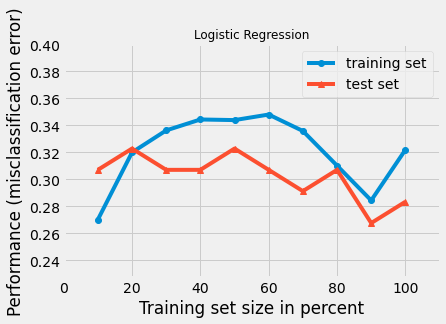

In [134]:
plot_learning_curves(X_train_scaled, y_train, X_test_scaled, y_test, model_linear, print_model=False)
plt.title('Logistic Regression');

## Decision Tree

In [135]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

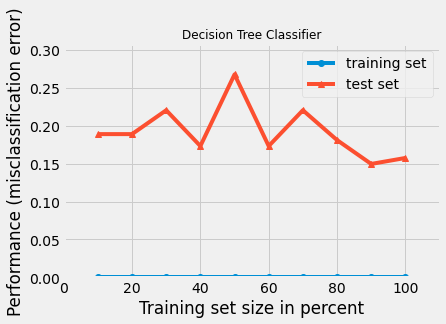

In [136]:
plot_learning_curves(X_train, y_train, X_test, y_test, model_tree, print_model=False)
plt.title('Decision Tree Classifier');

## Random Forest

In [141]:
model_forest = RandomForestClassifier(max_depth=3)
model_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

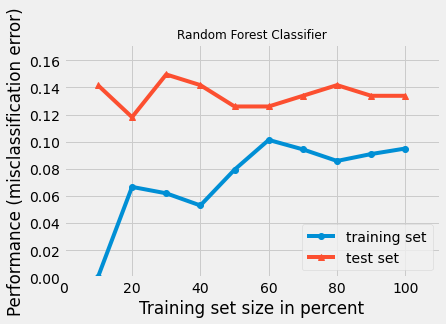

In [142]:
plot_learning_curves(X_train, y_train, X_test, y_test, model_forest, print_model=False)
plt.title('Random Forest Classifier');

## Gradient Boosting

In [158]:
model_boosting = GradientBoostingClassifier(learning_rate=0.01)
model_boosting.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

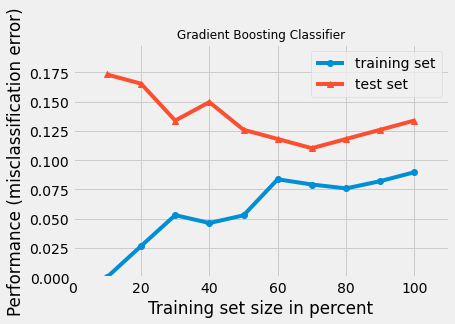

In [159]:
plot_learning_curves(X_train, y_train, X_test, y_test, model_boosting, print_model=False)
plt.title('Gradient Boosting Classifier');

# Notes
* Bias
  * Feature Engineering
  * Model Complexity
  * Ensembles
* Variance
  * Regularization
  * Feature Selection